In [1]:
from orbit import Orbit, AU2km, mu, day2s
import elements as el
import angles as an
from lambert_izzo import lambert as lambert_izzo

from lambert import lambert as lambert_bate

import sys

import numpy as np
from numpy.linalg import norm
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

In [2]:
df = pd.read_csv('../gtoc4_problem_data.txt', skiprows=2,delimiter= '\s+',header=None)
df.columns = ['Name','Epoch','a','e','i','LAN','omega','M0']
df.head()

,Name,Epoch,a,e,i,LAN,omega,M0
0,'1580',54800.0,2.196803,0.487683,52.090794,62.324795,159.539839,3.521687
1,'1620',54800.0,1.245551,0.335511,13.337693,337.266017,276.806539,136.950031
2,'1943',54800.0,1.430317,0.255816,8.704065,246.401915,338.253875,288.405238
3,'2061',54800.0,2.264953,0.537119,3.770822,207.654108,156.432028,46.995497
4,'2135',54800.0,1.599572,0.503268,23.054312,191.262849,290.838892,256.724981


In [3]:
asteroids = set()

In [4]:
df.iloc[0]

Name       '1580'
Epoch       54800
a          2.1968
e        0.487683
i         52.0908
LAN       62.3248
omega      159.54
M0        3.52169
Name: 0, dtype: object

In [5]:
[*df.iloc[0]]

["'1580'",
 54800.0,
 2.1968033753931695,
 0.4876831067819973,
 52.09079390385544,
 62.32479511597435,
 159.53983855505257,
 3.5216868177911254]

In [6]:
for i in range(len(df)):
    o = Orbit(name=df.iloc[i].Name)
    o.from_gtoc(*df.iloc[i])
    asteroids.add(o)

In [7]:
print(o.details())

Orbit: '6344P-L'
 Epoch     :  54800.0
 a         :  2.80410817 AU
 e         :  0.66708346
 inc       :  4.72681220 deg
 LAN       :  183.61177196 deg
 argp      :  234.06965519 deg
 meanAnom0 :  79.37913845 deg
 trueAnom0 :  147.76999611 deg
 h         :  5560417068.38247395 km2/s
 r0        :  [-3.22550105 -1.53048387 0.10949722] AU
 v0        :  [-3.20094406 -12.99547743 1.05573793] km/s


In [8]:
asteroids;

In [9]:
for ast in asteroids:
    print("**  **  **")
    print(ast.details())

**  **  **
Orbit: '7888'
 Epoch     :  54800.0
 a         :  2.43453393 AU
 e         :  0.66425421
 inc       :  26.07679261 deg
 LAN       :  165.96322783 deg
 argp      :  323.05141213 deg
 meanAnom0 :  319.77748041 deg
 trueAnom0 :  238.58902853 deg
 h         :  5198603122.64727211 km2/s
 r0        :  [2.04339365 0.19953478 -0.33728500] AU
 v0        :  [-16.80484505 13.62395795 -4.47365014] km/s
**  **  **
Orbit: '2004XD50'
 Epoch     :  54800.0
 a         :  1.82520005 AU
 e         :  0.37715799
 inc       :  20.66079938 deg
 LAN       :  106.16543751 deg
 argp      :  63.64040751 deg
 meanAnom0 :  172.65072610 deg
 trueAnom0 :  176.40828460 deg
 h         :  5576987821.85572433 km2/s
 r0        :  [2.30390773 -0.63721231 -0.76752557] AU
 v0        :  [3.59437701 14.13622065 -2.78589956] km/s
**  **  **
Orbit: '2008KE6'
 Epoch     :  54800.0
 a         :  1.68513490 AU
 e         :  0.51965081
 inc       :  3.42403798 deg
 LAN       :  113.77374551 deg
 argp      :  224.1729098

Orbit: '2007VH3'
 Epoch     :  54800.0
 a         :  1.97069009 AU
 e         :  0.43319999
 inc       :  2.91909582 deg
 LAN       :  120.31928204 deg
 argp      :  345.13315395 deg
 meanAnom0 :  116.05725525 deg
 trueAnom0 :  150.06087493 deg
 h         :  5639506698.15112495 km2/s
 r0        :  [-0.63912280 -2.48032210 0.09198026] AU
 v0        :  [12.95093489 -8.60745206 -0.34849853] km/s
**  **  **
Orbit: '2004BG121'
 Epoch     :  54800.0
 a         :  1.61241863 AU
 e         :  0.34285381
 inc       :  19.42971236 deg
 LAN       :  128.71228199 deg
 argp      :  206.69980606 deg
 meanAnom0 :  266.12751190 deg
 trueAnom0 :  230.45703711 deg
 h         :  5316770290.59202766 km2/s
 r0        :  [-1.55893527 -0.73097327 0.59033958] AU
 v0        :  [14.35865639 -14.75251379 -0.69758946] km/s
**  **  **
Orbit: '2007VH186'
 Epoch     :  54800.0
 a         :  1.57405504 AU
 e         :  0.19699307
 inc       :  19.23984794 deg
 LAN       :  51.53258328 deg
 argp      :  15.06271163 de

 v0        :  [-5.94633185 29.27234229 4.32029636] km/s
**  **  **
Orbit: '1999LV7'
 Epoch     :  54800.0
 a         :  2.20846157 AU
 e         :  0.47066387
 inc       :  30.48027450 deg
 LAN       :  87.48366231 deg
 argp      :  158.92595913 deg
 meanAnom0 :  319.83404396 deg
 trueAnom0 :  267.10522268 deg
 h         :  5844280235.77997017 km2/s
 r0        :  [-1.35409181 0.77562386 0.81626780] AU
 v0        :  [-0.43563054 -24.59757170 -0.37947473] km/s
**  **  **
Orbit: '2005QX151'
 Epoch     :  54800.0
 a         :  2.29687801 AU
 e         :  0.47282431
 inc       :  7.97492428 deg
 LAN       :  359.97322899 deg
 argp      :  36.28826112 deg
 meanAnom0 :  318.82702703 deg
 trueAnom0 :  265.41248794 deg
 h         :  5952312919.46259499 km2/s
 r0        :  [0.97323931 -1.56214836 -0.21878476] AU
 v0        :  [12.73953590 20.01212343 2.80442330] km/s
**  **  **
Orbit: '1999RK33'
 Epoch     :  54800.0
 a         :  2.48649540 AU
 e         :  0.58592215
 inc       :  2.89849436 d

Orbit: '2008BC15'
 Epoch     :  54800.0
 a         :  2.16713863 AU
 e         :  0.70967042
 inc       :  3.38697446 deg
 LAN       :  309.80938372 deg
 argp      :  263.75157529 deg
 meanAnom0 :  79.98286763 deg
 trueAnom0 :  151.33598838 deg
 h         :  4622839510.89969063 km2/s
 r0        :  [2.83748763 0.24076046 0.13812326] AU
 v0        :  [8.79310333 11.61034905 0.83968761] km/s
**  **  **
Orbit: '2008BO16'
 Epoch     :  54800.0
 a         :  2.43405422 AU
 e         :  0.80814317
 inc       :  8.60963011 deg
 LAN       :  134.00498557 deg
 argp      :  254.27341257 deg
 meanAnom0 :  92.24990551 deg
 trueAnom0 :  162.13817052 deg
 h         :  4095753310.28431511 km2/s
 r0        :  [-3.57335719 -0.63758489 0.45621953] AU
 v0        :  [-6.45944906 -8.72296311 1.62099720] km/s
**  **  **
Orbit: '2008CA5'
 Epoch     :  54800.0
 a         :  1.86156771 AU
 e         :  0.59316768
 inc       :  24.99156424 deg
 LAN       :  331.67944915 deg
 argp      :  272.87718960 deg
 meanAn

Orbit: '85818'
 Epoch     :  54800.0
 a         :  1.65665957 AU
 e         :  0.41694318
 inc       :  62.70177829 deg
 LAN       :  235.68415047 deg
 argp      :  301.30335283 deg
 meanAnom0 :  145.41526864 deg
 trueAnom0 :  164.05686821 deg
 h         :  5214490999.25615120 km2/s
 r0        :  [1.17562089 -0.06975547 1.95760836] AU
 v0        :  [8.25878671 13.09885117 -1.09136968] km/s
**  **  **
Orbit: '85867'
 Epoch     :  54800.0
 a         :  1.83044366 AU
 e         :  0.30197524
 inc       :  0.94273774 deg
 LAN       :  254.73826095 deg
 argp      :  286.92894040 deg
 meanAnom0 :  315.48892813 deg
 trueAnom0 :  284.15804964 deg
 h         :  5748818380.13610363 km2/s
 r0        :  [-0.42234353 1.49036365 -0.01316027] AU
 v0        :  [-22.00505647 -13.26425454 -0.29187664] km/s
**  **  **
Orbit: '85938'
 Epoch     :  54800.0
 a         :  1.85252577 AU
 e         :  0.48307659
 inc       :  9.14975390 deg
 LAN       :  20.00323414 deg
 argp      :  197.55123507 deg
 meanAnom

In [10]:
sys.getsizeof(asteroids)

131296

In [11]:
o.rv(epoch=55000)

(array([-4.86888672e+08, -4.23182566e+08,  3.23856856e+07]),
 array([ 2.22951025, -9.44366981,  0.79092257]))

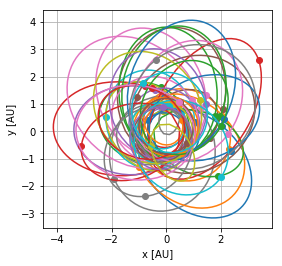

In [12]:
fig = plt.figure()
ax = plt.gca()
for i in range(50):
    o = asteroids.pop() #remove el
    asteroids.add(o) # place back into the set
    o.plot(num=50)

plt.grid()
ax.set_aspect(aspect=1)

In [13]:
len(asteroids)

1436

In [14]:
# create Earth
earth = Orbit(name='Earth')
earth.from_gtoc('Earth',54000,0.999988049532578, 1.671681163160e-2, 0.8854353079654e-3, 175.40647696473, 287.61577546182, 257.60683707535)
print(earth.details())

Orbit: Earth
 Epoch     :  54000
 a         :  0.99998805 AU
 e         :  0.01671681
 inc       :  0.00088544 deg
 LAN       :  175.40647696 deg
 argp      :  287.61577546 deg
 meanAnom0 :  257.60683708 deg
 trueAnom0 :  255.74455168 deg
 h         :  4456566001.94500351 km2/s
 r0        :  [1.00360834 -0.02160433 -0.00000091] AU
 v0        :  [0.15588657 29.66001209 -0.00045708] km/s


In [15]:
o=asteroids.pop()   # take random asteroid
asteroids.add(o)
print(o.details())

Orbit: '2008QC'
 Epoch     :  54800.0
 a         :  2.27342635 AU
 e         :  0.51952398
 inc       :  11.11165667 deg
 LAN       :  17.07348434 deg
 argp      :  301.40264775 deg
 meanAnom0 :  32.25926820 deg
 trueAnom0 :  88.36310257 deg
 h         :  5742403581.67661572 km2/s
 r0        :  [1.12325977 1.17847632 0.15648505] AU
 v0        :  [-8.75351720 24.32654235 5.07201436] km/s


In [16]:
# for each launch
launch_step = 10
earliest_launch_date = 57023
latest_launch_date = 61041+10
earliest_launch_date = 58500
latest_launch_date = 59000

launch_dates = np.arange(earliest_launch_date, latest_launch_date, step=launch_step) # in MJD

launch_dates

array([58500, 58510, 58520, 58530, 58540, 58550, 58560, 58570, 58580,
       58590, 58600, 58610, 58620, 58630, 58640, 58650, 58660, 58670,
       58680, 58690, 58700, 58710, 58720, 58730, 58740, 58750, 58760,
       58770, 58780, 58790, 58800, 58810, 58820, 58830, 58840, 58850,
       58860, 58870, 58880, 58890, 58900, 58910, 58920, 58930, 58940,
       58950, 58960, 58970, 58980, 58990])

In [17]:
# test lambert for one asteroid at initial time
r_earth, v_earth = earth.rv(epoch = earliest_launch_date)
r_ast, v_ast = o.rv(epoch=earliest_launch_date+60)

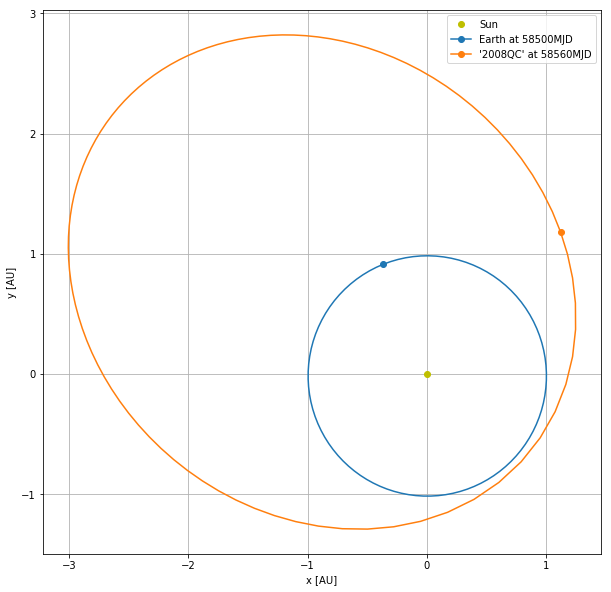

In [18]:
fig = plt.figure(figsize=(10,10))
plt.plot(0,0,'oy',label='Sun')
earth.plot(start=earliest_launch_date)
o.plot(start=earliest_launch_date + 60)
plt.legend()
plt.grid()

In [19]:
norm(r_earth)/AU2km

0.9834603057830545

In [20]:
try:
    # use Lambert formulation by izzo by default
    v1, v2 = lambert_izzo(o.mu, r_earth, r_ast,tof=60*day2s, M=0, return_='short')
except:
    # use Bate Lambert formulation if izzo fails
    v1, v2 = lambert_bate(o.mu, r_earth, r_ast, tof=60*day2s, grade='pro')
    print('Used Bate-lambert')

In [21]:
# check both methods
v1izzo, v2izzo = lambert_izzo(o.mu, r_earth, r_ast,tof=60*day2s, M=0, return_='short')
print(f'{v1izzo},{v2izzo}')
v1bate, v2bate = lambert_bate(o.mu, r_earth, r_ast, tof=60*day2s, grade='pro')
print(f'{v1bate},{v2bate}')

[ 16.32680475 -63.95330061  -0.90743475],[37.49848787 46.91927685  5.5313538 ]
[ 16.32680475 -63.95330061  -0.90743475],[37.49848787 46.91927685  5.5313538 ]


In [22]:
v1, v2

(array([ 16.32680475, -63.95330061,  -0.90743475]),
 array([37.49848787, 46.91927685,  5.5313538 ]))

In [23]:
o_trx = Orbit(name='trx1')  # trajectory object

In [24]:
o_trx.from_rv(earliest_launch_date, r_earth, v1) # initial position vector of trajectory object

In [25]:
earliest_launch_date

58500

In [26]:
o_trx.__dict__

{'name': 'trx1',
 'mu': 132712440018.0,
 'epoch0': 58500,
 'r0': array([-5.46446833e+07,  1.36704976e+08, -2.03819016e+03]),
 'v0': array([ 16.32680475, -63.95330061,  -0.90743475]),
 'h': 1269813662.510653,
 'e': 1.1107950736037402,
 'LAN': 5.092529346977193,
 'inc': 0.10550847492563367,
 'argp': 5.684424635780617,
 'trueAnom0': 3.74048478418152,
 'meanAnom0': -1.7591135316732767,
 'a': -51951947.78144961}

In [27]:
o_trx.trueAnom0

3.74048478418152

In [28]:
o_trx.e

1.1107950736037402

In [29]:
print(o_trx.details())

Orbit: trx1
 Epoch     :  58500
 a         :  -0.34704534 AU
 e         :  1.11079507
 inc       :  6.04519032 deg
 LAN       :  291.78043863 deg
 argp      :  325.69354059 deg
 meanAnom0 :  -100.78978105 deg
 trueAnom0 :  214.31399147 deg
 h         :  1269813662.51065302 km2/s
 r0        :  [-0.36503314 0.91320588 -0.00001362] AU
 v0        :  [16.32680475 -63.95330061 -0.90743475] km/s


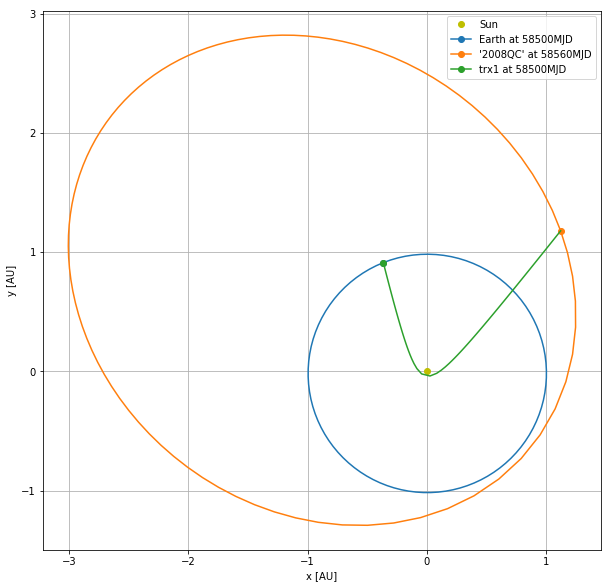

In [30]:
fig = plt.figure(figsize=(10,10))
plt.plot(0,0,'oy',label='Sun')
earth.plot(start=earliest_launch_date)
o.plot(start=earliest_launch_date+60,num=100)
o_trx.plot(earliest_launch_date, earliest_launch_date + 60) # plots trajectory
plt.legend()
plt.grid()
ax = plt.gca()
ax.set_aspect(1)

In [31]:
#fig = plt.figure(figsize=(6, 6))
#ax = fig.add_subplot(111, projection='3d')
#earth.plot(start=earliest_launch_date,num=100,dim=3)

In [32]:
dv1=v1-v_earth
print(dv1)
print(norm(dv1))

[ 44.46359762 -52.7879617   -0.90764156]
69.02466390031755


In [33]:
dv2=v2-v_ast
print(dv2)
print(norm(dv2))

[46.26508923 22.60647307  0.46116434]
51.494890805978606


In [34]:
# for each launch
launch_step = 10
earliest_launch_date = 57023
latest_launch_date = 61041+10
earliest_launch_date = 58500
latest_launch_date = 59000

launch_dates = np.arange(earliest_launch_date, latest_launch_date, step=launch_step) # in MJD

launch_dates = np.arange(58676-50, 58676+50, step=launch_step) # in MJD

print(launch_dates)

tof_vals = np.arange(20,65,5)
print(tof_vals)

[58626 58636 58646 58656 58666 58676 58686 58696 58706 58716]
[20 25 30 35 40 45 50 55 60]


In [35]:
type(earth)

orbit.Orbit

In [36]:

vinf_max = 4.1  # threshold c3 [km/s]

assert len(asteroids) == 1436, "check number of asteroids"
   
# store number of times where izzo lambert did not converge
use_izzo = 0
use_bate = 0

ind = 0
for ld in launch_dates:
    for tof in tof_vals:
        for ast in asteroids:

            re, ve = earth.rv(epoch=ld)
            ra, va = ast.rv(epoch=ld+tof)
            try:
                v1, v2 = lambert_izzo(earth.mu, re, ra,tof=tof*day2s,M=0, return_='short')
                use_izzo += 1
            except:
                v1, v2 = lambert_bate(o.mu, r_earth, r_ast, tof=60*day2s, grade='pro')
                use_bate += 1
             
            vinf = norm(v1-ve)
            
            if vinf<vinf_max:
                
                print(f'{ind}: date: {ld}, tof: {tof}, ast: {ast}, \t vinf: {vinf:3.2e}')
                ind += 1



C:\Users\yurio\Documents\GitHub\reGTOC04\jupyternotebooks\lambert_izzo.py:213: RuntimeWarning: invalid value encountered in double_scalars
  S_1 = (1- ll - x * eta)**0.5


0: date: 58626, tof: 20, ast: '2003LH', 	 vinf: 4.07e+00
1: date: 58626, tof: 55, ast: '2005NE21', 	 vinf: 3.97e+00
2: date: 58626, tof: 55, ast: '2006WP127', 	 vinf: 3.69e+00
3: date: 58636, tof: 55, ast: '141593', 	 vinf: 4.07e+00
4: date: 58636, tof: 60, ast: '141593', 	 vinf: 3.09e+00
5: date: 58636, tof: 60, ast: '2000QW7', 	 vinf: 4.02e+00
6: date: 58646, tof: 50, ast: '141593', 	 vinf: 3.52e+00
7: date: 58646, tof: 55, ast: '2006QV89', 	 vinf: 3.78e+00
8: date: 58646, tof: 55, ast: '141593', 	 vinf: 2.53e+00
9: date: 58646, tof: 55, ast: '2000QW7', 	 vinf: 4.00e+00
10: date: 58646, tof: 60, ast: '2008SJ82', 	 vinf: 3.14e+00
11: date: 58646, tof: 60, ast: '141593', 	 vinf: 1.79e+00
12: date: 58646, tof: 60, ast: '2000QW7', 	 vinf: 3.13e+00
13: date: 58656, tof: 45, ast: '141593', 	 vinf: 3.00e+00
14: date: 58656, tof: 50, ast: '2008SJ82', 	 vinf: 4.07e+00
15: date: 58656, tof: 50, ast: '2006QV89', 	 vinf: 3.49e+00
16: date: 58656, tof: 50, ast: '2002JR100', 	 vinf: 4.10e+00
17: d

137: date: 58696, tof: 40, ast: '2000QW7', 	 vinf: 1.40e+00
138: date: 58696, tof: 45, ast: '2008SJ82', 	 vinf: 3.97e+00
139: date: 58696, tof: 45, ast: '2006QV89', 	 vinf: 1.09e+00
140: date: 58696, tof: 45, ast: '2002JR100', 	 vinf: 2.94e+00
141: date: 58696, tof: 45, ast: '2004SA20', 	 vinf: 3.55e+00
142: date: 58696, tof: 45, ast: '2000QW7', 	 vinf: 1.06e+00
143: date: 58696, tof: 50, ast: '2006QV89', 	 vinf: 8.99e-01
144: date: 58696, tof: 50, ast: '2002JR100', 	 vinf: 3.11e+00
145: date: 58696, tof: 55, ast: '2001TB', 	 vinf: 3.87e+00
146: date: 58696, tof: 55, ast: '2006QV89', 	 vinf: 8.53e-01
147: date: 58696, tof: 55, ast: '2002JR100', 	 vinf: 3.26e+00
148: date: 58696, tof: 55, ast: '2004SA20', 	 vinf: 1.55e+00
149: date: 58696, tof: 55, ast: '2007RQ12', 	 vinf: 1.85e+00
150: date: 58696, tof: 60, ast: '2006QV89', 	 vinf: 8.86e-01
151: date: 58696, tof: 60, ast: '2002JR100', 	 vinf: 3.40e+00
152: date: 58696, tof: 60, ast: '2004SA20', 	 vinf: 2.45e+00
153: date: 58696, tof: 6

In [37]:
print(f'Number of times izzo-lambert failed: {use_bate} out of {use_bate+use_izzo}')

Number of times izzo-lambert failed: 6673 out of 129240


In [38]:
sys.getsizeof(asteroids)  # what is this doing?

131296